Data preparation:
* Load data: Load data from various sources such as CSV files, databases or APIs.
* Clean data: Remove missing values, duplicates and inconsistent data.
* Transform data: Perform data manipulations such as converting data types, creating new variables and aggregating data.
* Explore data: Examine the distribution of data, Identify outliers and correlations between variables.

Load data: Load data from various sources such as CSV files, databases or APIs.


In [1]:
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

In [3]:
# read in csv file and display first 5 rows of datset
df = pd.read_csv("/Users/aileenpfleiderer/Desktop/GitHub_datasets_Aileen/github_users.csv")
df.head()

,login,avatar_url,type,site_admin,name,company,blog,location,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,torvalds,https://avatars.githubusercontent.com/u/102402...,User,False,Linus Torvalds,Linux Foundation,NaN,"Portland, OR",NaN,NaN,NaN,NaN,7.00,0.00,"192,033.00",0.00,2011-09-03T15:26:22Z,2023-08-15T05:21:45Z
1,yyx990803,https://avatars.githubusercontent.com/u/499550...,User,False,Evan You,vuejs,http://evanyou.me,Singapore,NaN,NaN,NaN,NaN,185.00,72.00,"95,692.00",95.00,2010-11-28T01:05:40Z,2023-09-26T13:44:39Z
2,gaearon,https://avatars.githubusercontent.com/u/810438...,User,False,dan,@bluesky-social,NaN,NaN,dan.abramov@gmail.com,NaN,NaN,dan_abramov,267.00,78.00,"84,989.00",172.00,2011-05-25T18:18:31Z,2023-08-28T19:01:10Z
3,ruanyf,https://avatars.githubusercontent.com/u/905434...,User,False,Ruan YiFeng,NaN,https://twitter.com/ruanyf,"Shanghai, China",yifeng.ruan@gmail.com,NaN,NaN,NaN,68.00,27.00,"76,530.00",0.00,2011-07-10T01:07:17Z,2023-09-28T06:43:20Z
4,peng-zhihui,https://avatars.githubusercontent.com/u/129948...,User,False,稚晖,HUAWEI Research,http://www.pengzhihui.xyz,Shanghai,peng-zhihui@foxmail.com,NaN,野生钢铁侠本侠。,NaN,56.00,0.00,"73,963.00",9.00,2015-06-22T04:59:39Z,2023-10-04T03:24:07Z


In [4]:
# check which columns are included in our dataframe
df.columns

Index(['login', 'avatar_url', 'type', 'site_admin', 'name', 'company', 'blog',
       'location', 'email', 'hireable', 'bio', 'twitter_username',
       'public_repos', 'public_gists', 'followers', 'following', 'created_at',
       'updated_at'],
      dtype='object')

In [5]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df.shape

(150202, 18)

Clean data: Remove missing values, duplicates and inconsistent data.

In [6]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150202 entries, 0 to 150201
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object 
 3   site_admin        150202 non-null  bool   
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   object 
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 
 12  public_repos      150202 non-null  float64
 13  public_gists      150202 non-null  float64
 14  followers         150202 non-null  float64
 15  following         150202 non-null  float64
 16  created_at        15

**Data-types**  
- object: We see that we have a lot of object data-types in our dataset. This means, we have strings (meaning text) or mixed data-types in these columns. 

#   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object   
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   object 
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 
 16  created_at        150202 non-null  object 
 17  updated_at        150202 non-null  object 

Do we need to change our data-types into a date format or sth. else?. We will keep that in mind and come back to this later.  

- int64: We do not have any int values so far
  
- bool: Reg. the side_admin-value: 
The boolean type indicates, that values are either True or False in these columns - which makes sense when looking at our column names and descriptions:
Not everyone can become a "site_admin" on GitHub. This role is typically granted by GitHub itself, based on criteria such as expertise, experience, and contributions to the GitHub community. Site administrators are selected individuals with extensive knowledge of the GitHub platform, software development, open-source communities, and platform administration. There is no public application process; individuals are usually invited by GitHub to assume the role of site administrator.


 **Missing values**  
- Below the header *Non-Null* we see how many non-null values we have per column.  Except for description, we have 40840 non-null values in each column which is exactly the same number as we have rows.   
 Meaning: We only seem to have missing values in the description column.

- Regarding our shape, we see that we have 150202 values in total: (150202, 18)

#   Column            Non-Null Count   Dtype  
---  ------            --------------   -----    
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   object 
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 

the above values: name, company, blog, location, email, hireable, bio and twitter_username do have missings

- the following values do not have any missings: login, avatur_url, type, site_admin, public_repos, public_gists, followers, following, 
created_at, updated_at

#   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object 
 3   site_admin        150202 non-null  bool   
 12  public_repos      150202 non-null  float64
 13  public_gists      150202 non-null  float64
 14  followers         150202 non-null  float64
 15  following         150202 non-null  float64
 16  created_at        150202 non-null  object 
 17  updated_at        150202 non-null  object 



In [37]:
# type
# needs to be converted to string and "Organization"-rows needs to be deleted 
df['type'] = df['type'].astype(str)
print(df.dtypes)
# Umwandlung in string anstatt type klappt nicht
# check datatypes

login                object
avatar_url           object
type                 object
site_admin             bool
name                 object
company              object
blog                 object
location             object
email                object
hireable            boolean
bio                  object
twitter_username     object
public_repos        float64
public_gists        float64
followers           float64
following           float64
created_at           object
updated_at           object
dtype: object


In [39]:
print(df["type"].dtype) #object
unique_values_type = df["type"].unique()
for value in unique_values_type:
    print(f"Type of {value}: {type(value)}")

#In this case, the column does not contain any Python objects such as lists or dictionaries, but only character strings. 
#Therefore, there is no 
#need to convert these strings into other data types, as they are already recognized as "object" (string).

object
Type of User: <class 'str'>
Type of Organization: <class 'str'>


In [8]:
 #check bool: Reg. the side_admin-value: 
count_uniques_site_admin=df["site_admin"].nunique()
print(count_uniques_site_admin)
# reg. site_admin there are two uniques values. check! TRUE and FALSE

2


In [9]:
#count how many TRUE and how many FALSE reg. site_admin 
count_uniques_value_count=df["site_admin"].value_counts()
print(count_uniques_value_count)
#504 True, that means that 504 users listed in this dataset are site_admins
#keep that in mind for later suggestions

site_admin
False    149698
True        504
Name: count, dtype: int64


In [ ]:
#to think about later: are there are correlations reg. site_admin and success reg. username and repo
#keep in mind! 

In [20]:
#check how to deal with the missings here
print(df["name"].isnull().sum())
print(df["company"].isnull().sum())
print(df["blog"].isnull().sum())
print(df["location"].isnull().sum())
print(df["email"].isnull().sum())
print(df["hireable"].isnull().sum())
print(df["twitter_username"].isnull().sum())
print(df["bio"].isnull().sum())



12082
76203
51090
39597
81195
112019
99243
54144


In [ ]:
# are there any values of the having missings one, we can decide to delete or create a new df without them? 
# lets check
# the above values: name, company, blog, location, email, hireable, bio and twitter_username do have missings

In [ ]:
# checking how to deal with the missings here

# delete, or keep, but create new df without this variable
# name is the complete private name, so for privacy reasons, some have not added them,
# so we do not want them in our study for privacy reasons
# same with # company
# same with # blog
# same with # # email

# deal with the missings

# keep in mind for later research
# hireable : keep in mind for later research (112019 missings)
# location: keep in mind for later research (39597 missings)

#NLP????
# bio: interesting information and hashtags reg. interests of user, keep in mind for NLP component extractions maybe?!
# (54144 missings)
# twitter_username (99243 missings) interesting reg. entropy research

In [ ]:
# result of checking missings.. for entropy df and research we can just take variables with no missings
# and keep the others in mind for later research
# so creating now a new df!

Transform data: Perform data manipulations such as converting data types, creating new variables and aggregating data.

In [22]:
# Summary
#create new df including the following variables: login,

 #0   login             150202 non-null  object >keep for new df
 #1   avatar_url        150202 non-null  object > save for later research 
 #2   type              150202 non-null  object >keep for new df
 #3   site_admin        150202 non-null  bool >keep for new df  
 #12  public_repos      150202 non-null  float64 >keep for new df
 #13  public_gists      150202 non-null  float64 >keep for new df
 #14  followers         150202 non-null  float64 >keep for new df
 #15  following         150202 non-null  float64 >keep for new df
 #16  created_at        150202 non-null  object >keep for new df
 #17  updated_at        150202 non-null  object >keep for new df

# not necessary variables: 
# avatar_url : 
# The "Avatar URL" on GitHub is the URL that points to a user's profile picture or avatar.
# It allows users to access and display a user's 
# profile picture for various purposes such as viewing profiles or interacting with user data via the GitHub API.
# type : 
# this means whether the type of login/username is a user itself or a organization? check below. 


# what to do with type? 
import pandas as pd
df_entropy = df[["login","type","site_admin","public_repos","public_gists","followers","following","created_at","updated_at"]]


In [23]:
df_entropy.info() #check: new dataframe with necessary variables and without missings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150202 entries, 0 to 150201
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   login         150202 non-null  object 
 1   type          150202 non-null  object 
 2   site_admin    150202 non-null  bool   
 3   public_repos  150202 non-null  float64
 4   public_gists  150202 non-null  float64
 5   followers     150202 non-null  float64
 6   following     150202 non-null  float64
 7   created_at    150202 non-null  object 
 8   updated_at    150202 non-null  object 
dtypes: bool(1), float64(4), object(4)
memory usage: 9.3+ MB


In [ ]:
# further to do
# check dtypes
# datatypes? created_at e.g.
# delete type "Organization"
# rename login to username
# create column being_active_period

In [31]:
df.loc[:, 'login'] = df['login'].astype(str)
print(df.dtypes)

login                object
avatar_url           object
type                 object
site_admin             bool
name                 object
company              object
blog                 object
location             object
email                object
hireable            boolean
bio                  object
twitter_username     object
public_repos        float64
public_gists        float64
followers           float64
following           float64
created_at           object
updated_at           object
dtype: object


In [32]:
# login
# needs to be converted to string and renamed to username
#df_entropy['login'] = df_entropy['login'].astype(str)
df_entropy.rename(columns={'login': 'username'}, inplace=True)
df_entropy['username'] = df_entropy['username'].astype(str)
print(df_entropy.dtypes) # username still is object and not str? check
#print(df_entropy['username'].apply(type))

#it is not possible to change login/username to string? why? check! 

#The warning "value is trying to be set on a copy of a slice from a DataFrame" occurs when Pandas suspects 
#that you are trying to assign values to a copy of a 
#DataFrame slice instead of the original DataFrame. This can lead to unexpected behavior.

# see above! already "object" (string)

username         object
type             object
site_admin         bool
public_repos    float64
public_gists    float64
followers       float64
following       float64
created_at       object
updated_at       object
dtype: object


/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_27724/2853636612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy.rename(columns={'login': 'username'}, inplace=True)
/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_27724/2853636612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy['username'] = df_entropy['username'].astype(str)


In [36]:
df_entropy.loc[:, 'username'] = df_entropy['username'].astype(str)
print(df_entropy.dtypes)

username         object
type             object
site_admin         bool
public_repos    float64
public_gists    float64
followers       float64
following       float64
created_at       object
updated_at       object
dtype: object


In [40]:
# type
# "Organization"-rows needs to be deleted 
#Remove all rows in which the value "Organization" appears in the "type" column
df_entropy = df_entropy[df_entropy['type'] != 'Organization']
count_uniques_value_count_type=df_entropy["type"].value_counts()
print(count_uniques_value_count_type) 

type
User    140941
Name: count, dtype: int64


In [41]:
# public_repos, public_gists, followers, following 
# needs to be converted to int64 instead of float
# Convert the columns from float to integer

df_entropy['public_repos'] = df_entropy['public_repos'].astype(int)
df_entropy['public_gists'] = df_entropy['public_gists'].astype(int)
df_entropy['followers'] = df_entropy['followers'].astype(int)
df_entropy['following'] = df_entropy['following'].astype(int)
print(df_entropy.dtypes)

username        object
type            object
site_admin        bool
public_repos     int64
public_gists     int64
followers        int64
following        int64
created_at      object
updated_at      object
dtype: object


/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_27724/2547979355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy['public_repos'] = df_entropy['public_repos'].astype(int)
/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_27724/2547979355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy['public_gists'] = df_entropy['public_gists'].astype(int)
/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_27724/2547979355.py:7: SettingWithCopyWarning: 
A value is tr

In [ ]:
# created_at and updated_at needs to be converted to kind of data type. Check! 
# Format: Formel out of csv: 2011-09-03T15:26:22Z 
# The format "2011-09-03T15:26:22Z" is an ISO 8601 date format that specifies the date and time in
# UTC time format. The individual parts of the format mean

#2011-09-03: Year-Month-Day
#T: Separator between date and time
#15:26:22: hours:minutes:seconds
#Z: Time zone, in this case UTC

In [42]:
# Convert the columns 'created_at' and 'updated_at' into a DateTime object
df_entropy['created_at'] = pd.to_datetime(df_entropy['created_at'])
df_entropy['updated_at'] = pd.to_datetime(df_entropy['updated_at'])
print(df_entropy.dtypes)

username                     object
type                         object
site_admin                     bool
public_repos                  int64
public_gists                  int64
followers                     int64
following                     int64
created_at      datetime64[ns, UTC]
updated_at      datetime64[ns, UTC]
dtype: object


/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_27724/4095048763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy['created_at'] = pd.to_datetime(df_entropy['created_at'])
/var/folders/t2/0dd5c77165b7j2h486htbk100000gn/T/ipykernel_27724/4095048763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy['updated_at'] = pd.to_datetime(df_entropy['updated_at'])


In [ ]:
# variables to be saved for later research and pot. new dfs (be aware of pot. convertions of dtypes! and check missings as 
# describe above)
# 1   avatar_url        150202 non-null  object > no missings! 
# 4   name              138120 non-null  object 
# 5   company           73999 non-null   object 
# 6   blog              99112 non-null   object 
# 7   location          110605 non-null  object 
# 8   email             69007 non-null   object 
# 9   hireable          38183 non-null   object 
# 10  bio               96058 non-null   object 
# 11  twitter_username  50959 non-null   object 

In [21]:
# check the variable type
#count how many unique reg. type
count_uniques_value_count_type=df["type"].value_counts()
print(count_uniques_value_count_type)
# there are two types: User and Organization, as we want to analyze personal branding reg. usernames, we here decide to 
# keep just the User ones and delete the others? that means also a reduction of pot. usernames? maybe first let them in, 
# and then decide to analyze entropy values comparing User and Orgas maybe? 

type
User            140941
Organization      9261
Name: count, dtype: int64


In [ ]:
#check how to deal with the object values? check, if every variables now have the correct dtype? 
# username and type are still object? check 

In [15]:
#hireable is marked as an object, whereas it is a boolsch (TRUE and FALSE), but keep in mind: maybe we do not need this value
#count how many TRUE and how many FALSE reg. hireable
count_uniques_value_count_hir=df["hireable"].value_counts()
print(count_uniques_value_count_hir)
#38183 True, that means that 38183 users listed in this dataset are hireable
#the other rows are missing as we cannot find any FALSE? interesting? 112019 are missing... 
#keep that in mind for later suggestions
#maybe we can check whether there are any correlations reg. hireable and success

hireable
True    38183
Name: count, dtype: int64


In [19]:
# now already convert hireable from object to boolean
df["hireable"] = df["hireable"].astype("boolean")
df.info()
#that worked: now the value hireable is a boolean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150202 entries, 0 to 150201
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   login             150202 non-null  object 
 1   avatar_url        150202 non-null  object 
 2   type              150202 non-null  object 
 3   site_admin        150202 non-null  bool   
 4   name              138120 non-null  object 
 5   company           73999 non-null   object 
 6   blog              99112 non-null   object 
 7   location          110605 non-null  object 
 8   email             69007 non-null   object 
 9   hireable          38183 non-null   boolean
 10  bio               96058 non-null   object 
 11  twitter_username  50959 non-null   object 
 12  public_repos      150202 non-null  float64
 13  public_gists      150202 non-null  float64
 14  followers         150202 non-null  float64
 15  following         150202 non-null  float64
 16  created_at        15

In [45]:
# create a new column 
# Calculate the difference between 'updated_at' and 'created_at'
delta = df_entropy['updated_at'] - df_entropy['created_at']

# Extract the number of years, months and days from the time delta
years = delta.dt.days // 365
months = (delta.dt.days % 365) // 30
days = (delta.dt.days % 365) % 30

# Create a new column with the total duration in years, months and days
df_entropy['duration'] = (years.astype(str) + ' Jahre, ' + 
                          months.astype(str) + ' Monate, ' + 
                          days.astype(str) + ' Tage')



In [46]:
print(df_entropy.info())
# duration seems to be object

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 0 to 150201
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   username      140941 non-null  object             
 1   type          140941 non-null  object             
 2   site_admin    140941 non-null  bool               
 3   public_repos  140941 non-null  int64              
 4   public_gists  140941 non-null  int64              
 5   followers     140941 non-null  int64              
 6   following     140941 non-null  int64              
 7   created_at    140941 non-null  datetime64[ns, UTC]
 8   updated_at    140941 non-null  datetime64[ns, UTC]
 9   duration      140941 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](2), int64(4), object(3)
memory usage: 10.9+ MB
None


In [49]:
# Convert the "duration" column to a datetime format
df_entropy['duration'] = (df_entropy['duration'].str.extract(r'(\d+) Jahre').astype(int) * 365 +
                          df_entropy['duration'].str.extract(r'(\d+) Monate').astype(int) * 30 +
                          df_entropy['duration'].str.extract(r'(\d+) Tage').astype(int))

df_entropy['duration'] = pd.to_timedelta(df_entropy['duration'], unit='D')
print(df_entropy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 0 to 150201
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   username      140941 non-null  object             
 1   type          140941 non-null  object             
 2   site_admin    140941 non-null  bool               
 3   public_repos  140941 non-null  int64              
 4   public_gists  140941 non-null  int64              
 5   followers     140941 non-null  int64              
 6   following     140941 non-null  int64              
 7   created_at    140941 non-null  datetime64[ns, UTC]
 8   updated_at    140941 non-null  datetime64[ns, UTC]
 9   duration      140941 non-null  timedelta64[ns]    
dtypes: bool(1), datetime64[ns, UTC](2), int64(4), object(2), timedelta64[ns](1)
memory usage: 10.9+ MB
None


In [ ]:
#datetime64[ns, UTC]: This data type represents a specific date and time in UTC time format. The [ns] indicates the 
#precision of the time in nanoseconds. The datetime64[ns, UTC] type is used to specify absolute times, e.g. a specific date and time.
#timedelta64[ns]: This data type represents a duration or a time difference between two points in time. 
#The [ns] again indicates the precision of the time in nanoseconds. The timedelta64[ns] type is used to specify relative 
#time spans, e.g. the
#number of days, hours, minutes or seconds between two points in time.

In [53]:
# Calculate the entropy for each row in the 'username' column
!pip install scipy
from scipy.stats import entropy
#entropies = df_entropy['username'].apply(lambda x: entropy(list(x)))
# Add the calculated entropy values as a new column 'entropy' to the DataFrame
#df_entropy['entropy'] = entropies

#does not work as the username is a string and not a numeric variable

Entropy
indicating a problem with data type. data types of the values in the 'username' column may not be compatible with the entropy function. entropy function in scipy.stats is just intended for numeric values, not strings. how to define the entropy of strings, as scipy is intended for numeric distributions.

entropy of the usernames as a measure? Higher entropy values indicate that usernames are less predictable and possibly more encrypted or less readable.

#write a function counting the number of different characters in each username and calculates the entropy based on those counts?

In [55]:
import pandas as pd
import math
from collections import Counter

# Function for calculating the entropy of a user name
def calculate_entropy(username):
    if len(username) == 0:
        return 0
    username_counts = Counter(username)
    username_length = len(username)
    entropy = 0
    for count in username_counts.values():
        probability = count / username_length
        entropy -= probability * math.log2(probability)
    return entropy

# Apply function to the 'username' column to calculate the entropy for each username
df_entropy['entropy'] = df_entropy['username'].apply(calculate_entropy)

# Output of the DataFrame with the new 'entropy' column
print(df_entropy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140941 entries, 0 to 150201
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   username      140941 non-null  object             
 1   type          140941 non-null  object             
 2   site_admin    140941 non-null  bool               
 3   public_repos  140941 non-null  int64              
 4   public_gists  140941 non-null  int64              
 5   followers     140941 non-null  int64              
 6   following     140941 non-null  int64              
 7   created_at    140941 non-null  datetime64[ns, UTC]
 8   updated_at    140941 non-null  datetime64[ns, UTC]
 9   duration      140941 non-null  timedelta64[ns]    
 10  entropy       140941 non-null  float64            
dtypes: bool(1), datetime64[ns, UTC](2), float64(1), int64(4), object(2), timedelta64[ns](1)
memory usage: 12.0+ MB
None


This function calculate_entropy(username) calculates the entropy of a username. Here is what happens in detail:

First, it checks to see if the username is empty. If so, the entropy is returned as 0, since there is no information content.
Then a counter object is created that counts the frequency of each character in the username.
The length of the username is calculated to normalize the probabilities later.
Then the entropy is initialized.
The loop loops through the values in the counter object, which contains the frequency of each character. For each character, the probability is calculated by dividing the frequency by the length of the user name. Then the entropy is calculated and summed according to the Shannon entropy formula.
Finally, the calculated entropy is returned.
So the function uses the Shannon entropy formula to calculate the information content of a username based on the distribution of characters in that name.

In [ ]:
# Entropy is a quantitative measurement of information content
# floating point number (float) to allow precise representation. 
# integer would maybe not be sufficient to capture the subtleties of entropy values.

In [56]:
df_entropy.describe()

,public_repos,public_gists,followers,following,duration,entropy
count,"140,941.00","140,941.00","140,941.00","140,941.00",140941,"140,941.00"
mean,76.35,17.06,285.12,142.30,3110 days 05:00:05.696000384,2.78
std,356.19,255.33,"1,160.41","1,801.76",1443 days 21:36:35.828777424,0.43
min,0.00,0.00,0.00,0.00,0 days 00:00:00,0.00
25%,19.00,0.00,88.00,5.00,2037 days 00:00:00,2.52
50%,42.00,2.00,123.00,28.00,3283 days 00:00:00,2.81
75%,81.00,13.00,217.00,92.00,4255 days 00:00:00,3.10
max,"50,000.00","62,057.00","192,033.00","302,941.00",5823 days 00:00:00,4.24


In [ ]:
# why do I receive entropy values higher than 1? 4.24 max? check! 


An entropy value of 4 could indicate that the string has a very high degree of unpredictability. In this case, the string could have a very complex and irregular distribution of characters, making it difficult to recognize patterns or regularities. This means that the string is very diverse and contains a wide variation of characters that are not easily predictable.

In terms of usernames, an entropy value of 4 could indicate that the usernames contain a wide variety of characters, both alphabetic characters and special characters, and that no particular patterns or regularities are recognizable in the usernames. This could indicate that the usernames are random or highly individual and have no obvious commonalities.



plausibility check

In [60]:
# Find the index of the entry with the maximum entropy
max_entropy_index = df_entropy['entropy'].idxmax()

# Select the username with this index
username_with_max_entropy = df_entropy.loc[max_entropy_index, 'username']

# Print the username
print("Username with maximum entropy:", username_with_max_entropy)

Username with maximum entropy: PClub-Ahmedabad-University


In [ ]:
#A username like "PClub-Ahmedabad-University" could have a high entropy because it consists of a 
#combination of different elements that potentially have a random or unpredictable structure. In this case, the high 
#entropy could indicate that the username is not easy to guess and contains a variety of characters and information. This 
#could indicate that the user may have deliberately tried to create a unique or hard-to-guess username 
#that contains various aspects such as the name of a club, university or city.

In [61]:
# Find the index of the username with the lowest entropy
min_entropy_index = df_entropy['entropy'].idxmin()

# Get the username with the lowest entropy
username_with_min_entropy = df_entropy.loc[min_entropy_index, 'username']

# Print the username
print("Username with the lowest entropy:", username_with_min_entropy)

Username with the lowest entropy: JJ


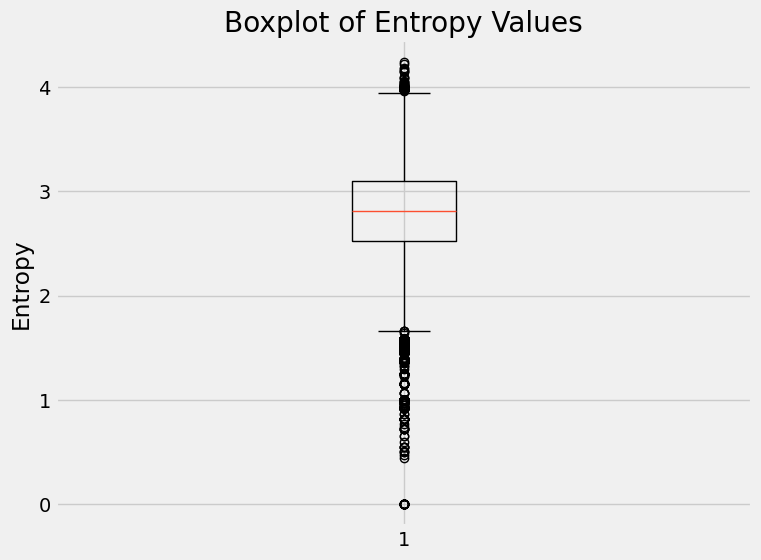

In [62]:
import matplotlib.pyplot as plt

# Create a boxplot of the entropy values
plt.figure(figsize=(8, 6))
plt.boxplot(df_entropy['entropy'])
plt.title('Boxplot of Entropy Values')
plt.ylabel('Entropy')
plt.show()

The entropy values are between 0 and 1.

An entropy value of 0 means that all characters in the username are identical, indicating maximum predictability.
A value of 1, on the other hand, means maximum unpredictability or maximum entropy, which indicates that all characters in the user name are unique and no structure or pattern is recognizable.
The interpretation depends heavily on the specific application. In some cases, low entropy values may indicate that the usernames are easily predictable, while high entropy values may indicate greater diversity or complexity in the usernames.

"predictable" and "interpretable" essentially means same. A low-entropy username is easier to predict or interpret because it has less variety or pattern. A high entropy username is harder to predict or interpret because it has more variety or random patterns.

The entropy was calculated using Shannon entropy (see function above!). This formula is often used to measure the unpredictability of data. For a given column of usernames in the DataFrame, the entropy values were calculated by counting the frequency of each character in the usernames and then calculating the Shannon entropy for that distribution. The higher the entropy, the more unpredictability or diversity there is in the usernames.

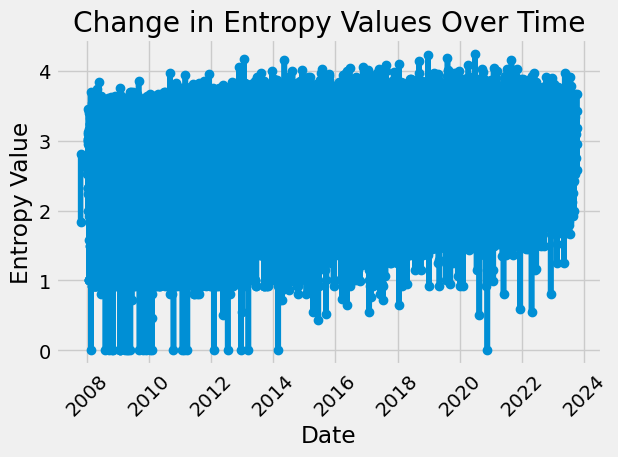

In [57]:
import matplotlib.pyplot as plt

# Assuming df_entropy contains columns 'created_at' and 'entropy'
# Make sure 'created_at' is in DateTime format
df_entropy['created_at'] = pd.to_datetime(df_entropy['created_at'])

# Sort the DataFrame by 'created_at'
df_entropy = df_entropy.sort_values(by='created_at')

# Plot
plt.plot(df_entropy['created_at'], df_entropy['entropy'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Entropy Value')
plt.title('Change in Entropy Values Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

#looks not so readable

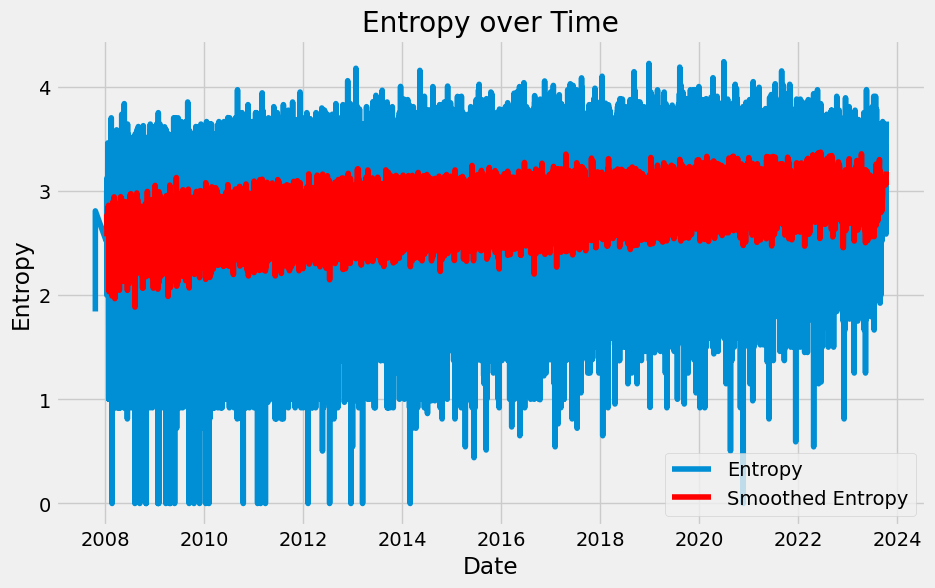

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_entropy is your DataFrame with timestamps and entropy values
# Create a copy of the DataFrame to not alter the timestamps
df_copy = df_entropy.copy()

# Set 'created_at' as the index of the DataFrame
df_copy.set_index('created_at', inplace=True)

# Apply a rolling mean function
smoothed = df_copy['entropy'].rolling(window=10).mean()

# Create a new plot
plt.figure(figsize=(10, 6))

# Plot the entropy values and the smoothed curve
plt.plot(df_copy.index, df_copy['entropy'], label='Entropy')
plt.plot(df_copy.index, smoothed, label='Smoothed Entropy', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Entropy')
plt.title('Entropy over Time')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# check how to viz this! 
# check how to interpret entropy and create personal branding column

low entropy value in the username indicates that the username is less random or less diverse. This could mean that the username is clearer and easier to remember, which in turn could promote recognition and branding. A clear and consistent username can help build a cohesive online presence and facilitate identity management

#1st Idea
?add a column that indicates whether the personal branding is good or not based on the entropy score?
#set a condition that evaluates the entropy score and sets a value in the new column accordingly.... maybe a function evaluate_branding is defined that receives the entropy value as an argument and decides whether the personal branding is good or not. function is applied to the 'entropy' column of the DataFrame to create a new column 'branding_evaluation' with the corresponding ratings. customizing the condition in the evaluate_branding function to set criteria for good or bad branding?

The Shannon entropy formula calculates the entropy based on the probability distribution of characters in a string. It returns values between 0 and 1, where 0 stands for complete predictability and 1 for maximum unpredictability. For personal branding, one could argue that an entropy value close to 0 indicates that the username is very predictable and potentially easy to remember or recognize. A value of 0.5 would mean that the username has a balanced mix of predictability and unpredictability. A value close to 1 would indicate that the username is very unpredictable and may be difficult to remember or recognize, but can be subjective and depends on the specific branding requirements and objectives. A low entropy score might indicate that the username is easily recognizable, which can be beneficial for good branding in some cases. In other cases, however, a certain amount of unpredictability may be desired to make the branding unique and stand out.

In this case, one could argue that a low entropy value, close to 0, indicates strong and easily memorable personal branding. Such a username would likely be easy to recognize and remember, which could be beneficial for branding. A higher entropy value would indicate that the username is less predictable and may be more difficult to remember.

#2nd IDEA
??add a column indicating whether the personal branding is good or not based on the entropy score and perform a threshold analysis. specify that an entropy score below a certain threshold is considered "good" for branding, while scores above it are considered "not so good".? create a new column called "branding" to indicate whether the personal branding is categorized as "good" or "not so good" based on the entropy value, setting the threshold for the classification. maybe customizing threshold to reflect your specific branding requirements and preferences? 

In [ ]:
#1st idea
# Assume df_entropy is your DataFrame with the column 'entropy'

# Function to evaluate the personal branding based on the entropy value
def evaluate_branding(entropy_value):
    if entropy_value < 1.5:
        return 'Good'
    else:
        return 'Not Good'

# Add a new column that evaluates the branding based on the entropy value
df_entropy['branding_evaluation'] = df_entropy['entropy'].apply(evaluate_branding)


In [ ]:
#2nd idea
# Assumed threshold for branding
threshold = 0.2

# Function to classify branding based on entropy value
def classify_branding(entropy):
    if entropy <= threshold:
        return 'Good'
    else:
        return 'Not so good'

# Adding the branding classification column to the DataFrame
df_entropy['branding'] = df_entropy['entropy'].apply(classify_branding)


In [ ]:
# Save the DataFrame as a CSV file
#df_entropy.to_csv('df_entropy.csv', index=False)
# where your current working directory is
#import os
#print(os.getcwd())

Explore data: Examine the distribution of data, Identify outliers and correlations between variables.